In [2475]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression


df = pd.read_csv('diabetes.csv')
len(df)

768

## Train and split
Function from sk learn, test_size means ..., random_state means
! [Imagen] (~ / Usuarios / agustintapia / Downloads / 1_train-test-split_0.jpeg)



In [2476]:
from sklearn.model_selection import train_test_split
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [2477]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [2478]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29
482,4,85,58,22,49,27.8,0.306,28
230,4,142,86,0,0,44.0,0.645,22
527,3,116,74,15,105,26.3,0.107,24


In [2479]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [2480]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

# Scale and transform data
Standard Scaler
fit_transforms means
transform means



In [2481]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression Function sci kit learn


In [2482]:
log_reg = LogisticRegression(random_state = 0)

# Argument explanation ('solver')
'liblinear': This is the default solver for logistic regression in scikit-learn. It is suitable for small to medium-sized datasets and works well for both binary and multi-class classification problems. It uses a coordinate descent algorithm with L1 and L2 regularization.

'newton-cg': This solver is appropriate for logistic regression with L2 regularization. It uses the Newton-CG optimization method, which is an iterative method for finding the minimum of a function.

'lbfgs': LBFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno) is another optimization method used for logistic regression with L2 regularization. It is efficient and suitable for medium to large datasets.

'sag': This solver is suitable for large datasets and works well with L2 regularization. SAG stands for Stochastic Average Gradient, and it uses a stochastic gradient descent variant.

'saga': SAGA is an improved version of the 'sag' solver, and it supports both L1 and L2 regularization. It is suitable for large datasets and can handle both binary and multi-class classification problems.

L1 refers to 'Lasso Regularization' which adds the absolute values of the coefficients as a penalty term to the loss function.
The regularization term added to the loss function is typically represented as λ * ∑|θi|, where θi represents the model's coefficients, and λ (lambda) is the regularization strength, which is a hyperparameter you can tune.
L1 regularization encourages sparsity in the model because it tends to force some of the coefficients to become exactly zero. This means that L1 regularization can be used for feature selection, as it effectively eliminates less important features from the model.
L1 regularization is useful when you suspect that only a subset of features is relevant for making predictions.

L2 refers to 'Ridge Regularization' which adds the squared values of the coefficients as a penalty term to the loss function.
The regularization term added to the loss function is typically represented as λ * ∑θi^2, where θi represents the model's coefficients, and λ (lambda) is the regularization strength, a hyperparameter.
L2 regularization penalizes large coefficients and encourages them to be small but does not force them to become exactly zero. It smooths the coefficient values.
L2 regularization is effective at preventing multicollinearity (correlation between predictor variables) by spreading the impact of correlated features across all of them.
L2 regularization is generally a good default choice when you want to add regularization to a linear model.

In [2483]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [2484]:
#LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          #intercept_scaling=1, max_iter=100, multi_class='warn',
          #n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          #tol=0.0001, verbose=0, warm_start=False)


# fit function
makes the model considered "trained" or "fitted" to the training data. It means that the model's internal parameters have been adjusted to approximate the underlying patterns in the data, making it capable of making predictions or classifications on new, unseen data.

In [2485]:
y_pred_test = log_reg.predict(X_test)

y_pred_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

# predict function
A function method to make predictions using a defined user classification model. The predict method takes an input feature matrix and returns the predicted class labels.



# predicted_proba function



In [2486]:
log_reg.predict_proba(X_test)[:,0] #probability of getting 0 in the outcome of diabetes

array([0.03968903, 0.8338895 , 0.90359877, 0.36625849, 0.87291746,
       0.96109097, 0.25572611, 0.14884923, 0.60121031, 0.63410739,
       0.42505737, 0.04067663, 0.70639194, 0.81272506, 0.87314545,
       0.8342337 , 0.13883551, 0.97242181, 0.57286659, 0.74478571,
       0.33785914, 0.57462601, 0.77382257, 0.93412367, 0.94759743,
       0.63622785, 0.95222235, 0.09077594, 0.88585942, 0.85489966,
       0.53614804, 0.74685199, 0.90188367, 0.53847424, 0.89798547,
       0.29062299, 0.54853269, 0.91279815, 0.66495897, 0.26097192,
       0.71196755, 0.77788173, 0.83707177, 0.17567622, 0.26451324,
       0.9906938 , 0.9139009 , 0.79690137, 0.63798232, 0.69487948,
       0.5966469 , 0.80920658, 0.12709418, 0.50623137, 0.86080727,
       0.997146  , 0.93659757, 0.44834759, 0.71874242, 0.92598011,
       0.28343102, 0.53626254, 0.89005629, 0.27412736, 0.31349204,
       0.09264757, 0.28437492, 0.85572543, 0.63794272, 0.88831386,
       0.87429167, 0.59603419, 0.89904438, 0.04675504, 0.15118

In [2487]:
log_reg.predict_proba(X_test)[:,1] #probability of getting 1 in the outcome of diabetes

array([0.96031097, 0.1661105 , 0.09640123, 0.63374151, 0.12708254,
       0.03890903, 0.74427389, 0.85115077, 0.39878969, 0.36589261,
       0.57494263, 0.95932337, 0.29360806, 0.18727494, 0.12685455,
       0.1657663 , 0.86116449, 0.02757819, 0.42713341, 0.25521429,
       0.66214086, 0.42537399, 0.22617743, 0.06587633, 0.05240257,
       0.36377215, 0.04777765, 0.90922406, 0.11414058, 0.14510034,
       0.46385196, 0.25314801, 0.09811633, 0.46152576, 0.10201453,
       0.70937701, 0.45146731, 0.08720185, 0.33504103, 0.73902808,
       0.28803245, 0.22211827, 0.16292823, 0.82432378, 0.73548676,
       0.0093062 , 0.0860991 , 0.20309863, 0.36201768, 0.30512052,
       0.4033531 , 0.19079342, 0.87290582, 0.49376863, 0.13919273,
       0.002854  , 0.06340243, 0.55165241, 0.28125758, 0.07401989,
       0.71656898, 0.46373746, 0.10994371, 0.72587264, 0.68650796,
       0.90735243, 0.71562508, 0.14427457, 0.36205728, 0.11168614,
       0.12570833, 0.40396581, 0.10095562, 0.95324496, 0.84881

# Accuracy

In [2488]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8247


# Compare the train-set and test-set accuracy

In [2489]:
y_pred_train = log_reg.predict(X_train)

y_pred_train

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [2490]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7622


## Check null accuracy

In [2492]:
y_test.value_counts()

Outcome
0    107
1     47
Name: count, dtype: int64

In [2493]:
null_accuracy = (107/(107+47))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6948


## Validation (Cross Validation)

In [2494]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train, y_train)

kfold = model_selection.KFold(n_splits=15)
modelCV = log_reg
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("15-fold cross validation average accuracy: %.3f" % (results.mean()))

15-fold cross validation average accuracy: 0.758


# Overfitting and underfitting

In [2495]:
print('Training set score: {:.4f}'.format(log_reg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(log_reg.score(X_test, y_test)))

Training set score: 0.7622
Test set score: 0.8247


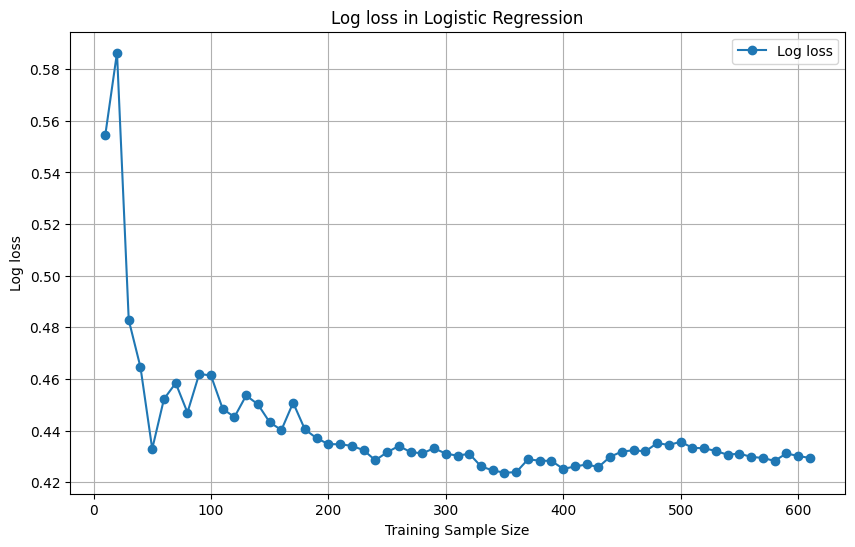

In [2496]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss


# Create a range of sample sizes for training subsets
sample_sizes = np.arange(10, len(X_train), 10)

# Initialize arrays to store bias and variance values
bias_values = []
variance_values = []
error_values =[]

# Train logistic regression models on different training subset sizes
for sample_size in sample_sizes:
    X_subset = X_train[:sample_size]
    y_subset = y_train[:sample_size]

    model = LogisticRegression()
    model.fit(X_subset, y_subset)

    y_pred = model.predict_proba(X_test)[:, 1]
    
    
    # Calculate log loss (cross-entropy) as a measure of error
    error = log_loss(y_test, y_pred)
    
    # Calculate bias and variance using the squared error decomposition
    #bias_sq = (1 - error) 
    #variance = error

    #bias_values.append(bias_sq)
    #variance_values.append(variance)
    error_values.append(error)

# Plot bias and variance as a function of sample size
plt.figure(figsize=(10, 6))
#plt.plot(sample_sizes, bias_values, label='Bias^2', marker='o')
#plt.plot(sample_sizes, variance_values, label='Variance', marker='o')
#plt.xlabel('Training Sample Size')
#plt.ylabel('Bias^2 and Variance')
#plt.title('Bias-Variance in Logistic Regression')

plt.plot(sample_sizes, error_values, label='Log loss', marker='o')
plt.xlabel('Training Sample Size')
plt.ylabel('Log loss')
plt.title('Log loss in Logistic Regression')


plt.legend()
plt.grid()
plt.show()

## bias variance tradeoff

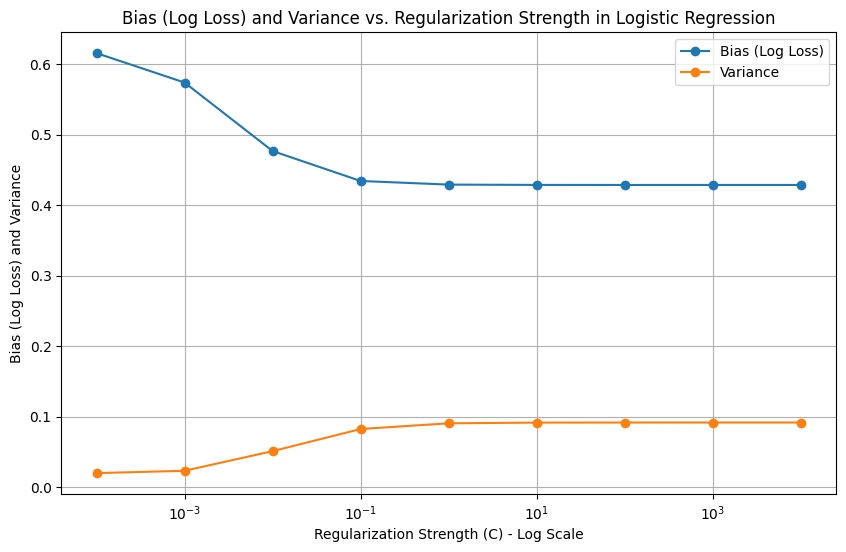

In [2497]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Define a range of regularization strengths (C values)
C_values = np.logspace(-4, 4, 9)
bias = []
variance = []

# Calculate bias and variance for different C values
for C in C_values:
    # Create a logistic regression model with the current C value
    model = LogisticRegression(C=C, random_state=42)
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred_probs = model.predict_proba(X_test)
    
    # Calculate the log loss (a measure of error) - this is the bias
    logloss = (log_loss(y_test, y_pred_probs))
    var = np.var(y_pred_probs)
    
    # Calculate variance as zero because logistic regression is a linear model
    variance.append(var)
    
    # Bias is log loss
    bias.append(logloss)

# Plot the bias and variance
plt.figure(figsize=(10, 6))
plt.plot(C_values, bias, label='Bias (Log Loss)', marker='o')
plt.plot(C_values, variance, label='Variance', marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (C) - Log Scale')
plt.ylabel('Bias (Log Loss) and Variance')
plt.title('Bias (Log Loss) and Variance vs. Regularization Strength in Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# Confussion Matrix

[[98  9]
 [18 29]]

True Positives(TP) =  98

True Negatives(TN) =  29

False Positives(FP) =  9

False Negatives(FN) =  18


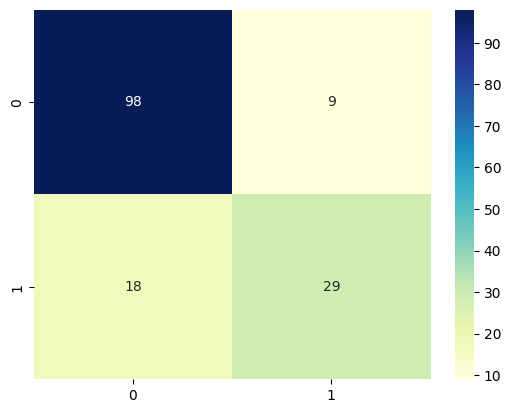

In [2498]:
from sklearn.metrics import confusion_matrix
import seaborn as sbs
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)
sbs.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')

print('\nTrue Positives(TP) = ', confusion_matrix[0,0])

print('\nTrue Negatives(TN) = ', confusion_matrix[1,1])

print('\nFalse Positives(FP) = ', confusion_matrix[0,1])

print('\nFalse Negatives(FN) = ', confusion_matrix[1,0])


## Clasification report

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

NameError: name 'y_pred_test' is not defined

## Validation Cruve

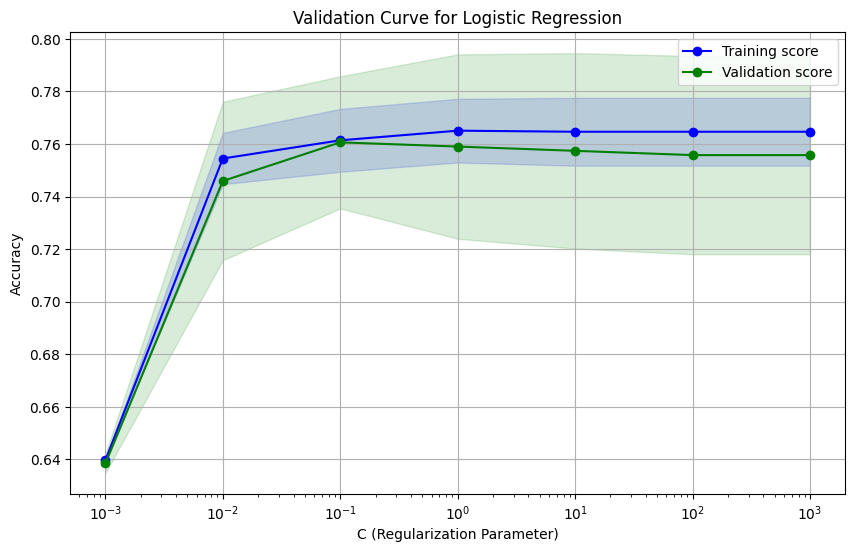

In [2500]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
param_range = np.logspace(-3, 3, 7)

# Calculate validation scores for different values of C
train_scores, test_scores = validation_curve(
    LogisticRegression(random_state=0), 
    X_train, y_train, param_name='C', param_range=param_range, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_mean, label='Training score', color='b', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')
plt.semilogx(param_range, test_mean, label='Validation score', color='g', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')
plt.title('Validation Curve for Logistic Regression')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#explanation 

Un valor alto de C (por ejemplo, C=1.0 o mayor) da como resultado un modelo menos regularizado y, por lo tanto, más complejo.
Un valor bajo de C (por ejemplo, C=0.01 o menor) da como resultado un modelo más regularizado y, por lo tanto, más simple.
Un valor de C menor aumentará la regularización, lo que puede dar lugar a coeficientes menores (incluido el término de sesgo)

## Learning curve

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

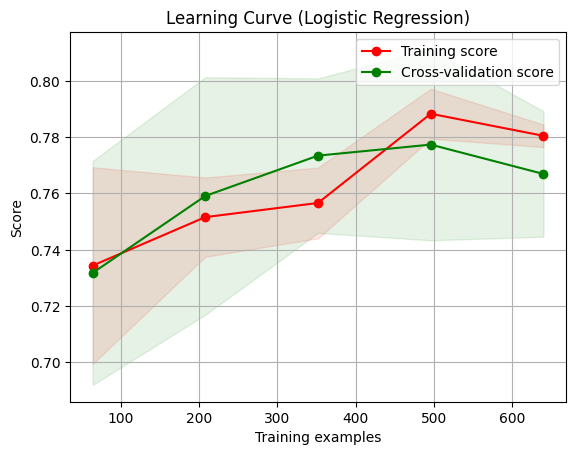

In [2501]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Load a dataset (example: the digits dataset)

# Create a logistic regression model
model = LogisticRegression( random_state=0)

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Create the learning curve plot
plot_learning_curve(model, "Learning Curve (Logistic Regression)", X, y, cv=6)
plt.savefig("Learning Curve (Logistic Regression).jpg")

plt.show()


#Learning curves are helpful for understanding whether your model is suffering 
#from overfitting (high variance) or underfitting (high bias).

#The learning curve will help you assess whether your logistic regression model is overfitting or underfitting. 
#If the training and validation scores are both low and close to each other, it may indicate underfitting (high bias). 
#If there's a large gap between the training and validation scores, it may indicate overfitting (high variance).


# Hyperparameter Optimization using GridSearch CV

In [2502]:
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('diabetes.csv')
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

y_pred_test = log_reg.predict(X_test)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Training set score: {:.4f}'.format(log_reg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(log_reg.score(X_test, y_test)))

parameters = [{'C':[0.001, 0.01, 0.1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = log_reg,  
                           param_grid = parameters,
                           #scoring = 'accuracy',
                           cv = 5,)
                           #verbose=0)


grid_search.fit(X_train, y_train)

Model accuracy score: 0.8247
Training set score: 0.7622
Test set score: 0.8247


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid=[{'C': [0.001, 0.01, 0.1, 10, 100, 1000]}])

In [2503]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7606


Parameters that give the best results : 

 {'C': 0.1}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.1, random_state=0)


In [2504]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))
print('GridSearch CV score on train set: {0:0.4f}'.format(grid_search.score(X_train, y_train)))

GridSearch CV score on test set: 0.8247
GridSearch CV score on train set: 0.7573


## Learning curve

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

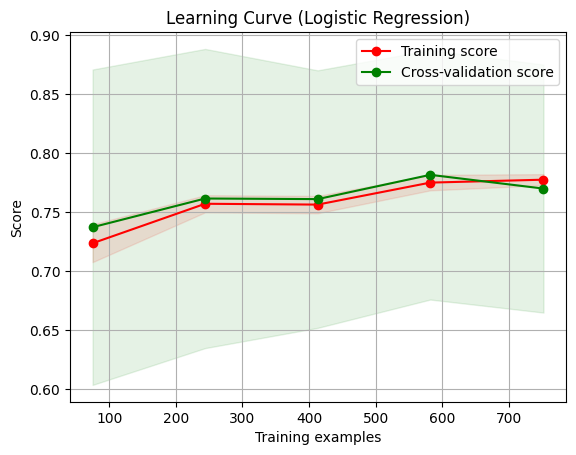

In [2505]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Load a dataset (example: the digits dataset)

# Create a logistic regression model
model = LogisticRegression(C = 0.1, random_state=0, max_iter=100)

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Create the learning curve plot
plot_learning_curve(model, "Learning Curve (Logistic Regression)", X, y, cv=50)
plt.savefig("Learning Curve (Logistic Regression)gd.jpg")
plt.show()

#Learning curves are helpful for understanding whether your model is suffering 
#from overfitting (high variance) or underfitting (high bias).

#The learning curve will help you assess whether your logistic regression model is overfitting or underfitting. 
#If the training and validation scores are both low and close to each other, it may indicate underfitting (high bias). 
#If there's a large gap between the training and validation scores, it may indicate overfitting (high variance).




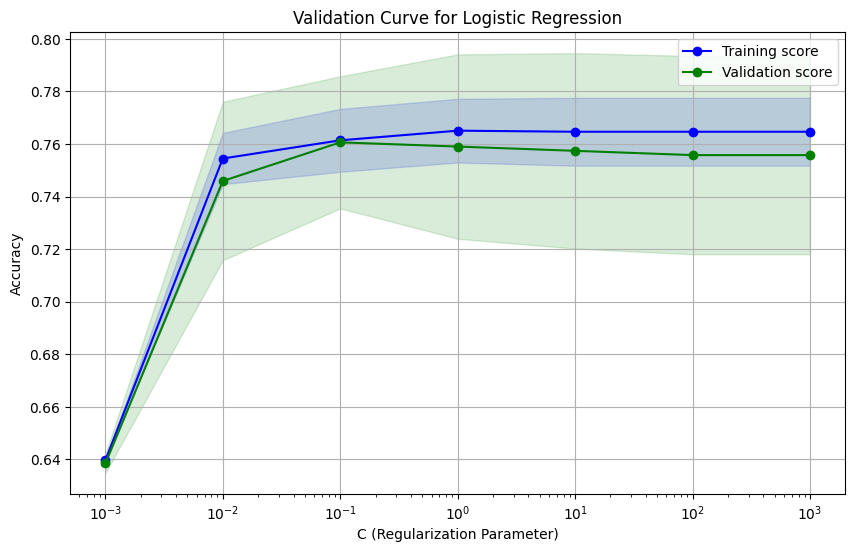

In [2506]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
param_range = np.logspace(-3, 3, 7)

# Calculate validation scores for different values of C
train_scores, test_scores = validation_curve(
    LogisticRegression(C = 0.1, random_state=0), 
    X_train, y_train, param_name='C', param_range=param_range, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_mean, label='Training score', color='b', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')
plt.semilogx(param_range, test_mean, label='Validation score', color='g', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')
plt.title('Validation Curve for Logistic Regression')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("Validation Curve (Logistic Regression)2gd.jpg")
plt.show()

#explanation 

# Decision Tree

In [2507]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
clf_gini = DecisionTreeClassifier(criterion='gini',random_state=0)

clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)


print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
print('Training set score: {:.4f}'.format(log_reg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(log_reg.score(X_test, y_test)))




Model accuracy score with criterion gini index: 0.7662
Training set score: 0.7622
Test set score: 0.8247


## bias variance tradeoff

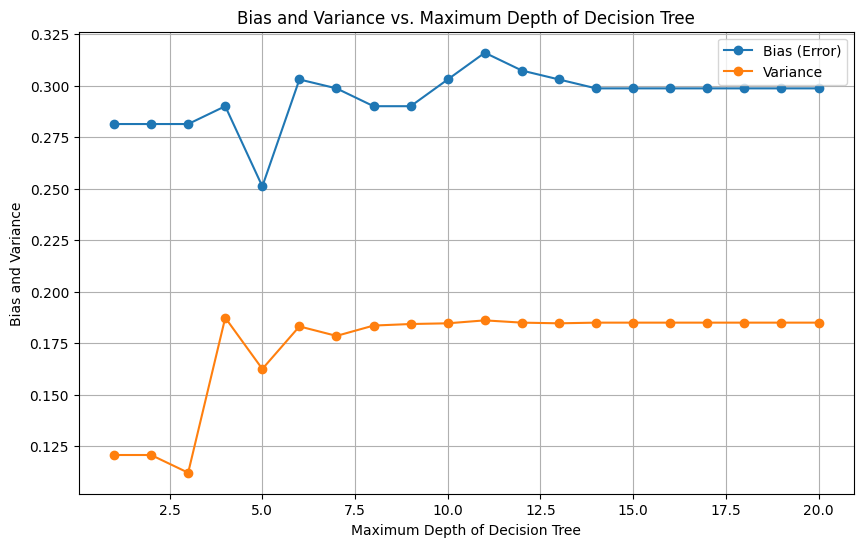

In [2508]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of maximum depths for the decision tree
max_depths = np.arange(1, 21)
bias = []
variance = []

# Calculate bias and variance for different max_depth values
for max_depth in max_depths:
    # Create a decision tree classifier
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy (you can replace this with an appropriate metric)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate bias (error) and variance
    bias.append(1 - accuracy)  # Bias is the error
    variance.append(np.var(y_pred) * (1 - np.var(y_pred)))  # Variance

# Plot the bias and variance
plt.figure(figsize=(10, 6))
plt.plot(max_depths, bias, label='Bias (Error)', marker='o')
plt.plot(max_depths, variance, label='Variance', marker='o')
plt.xlabel('Maximum Depth of Decision Tree')
plt.ylabel('Bias and Variance')
plt.title('Bias and Variance vs. Maximum Depth of Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


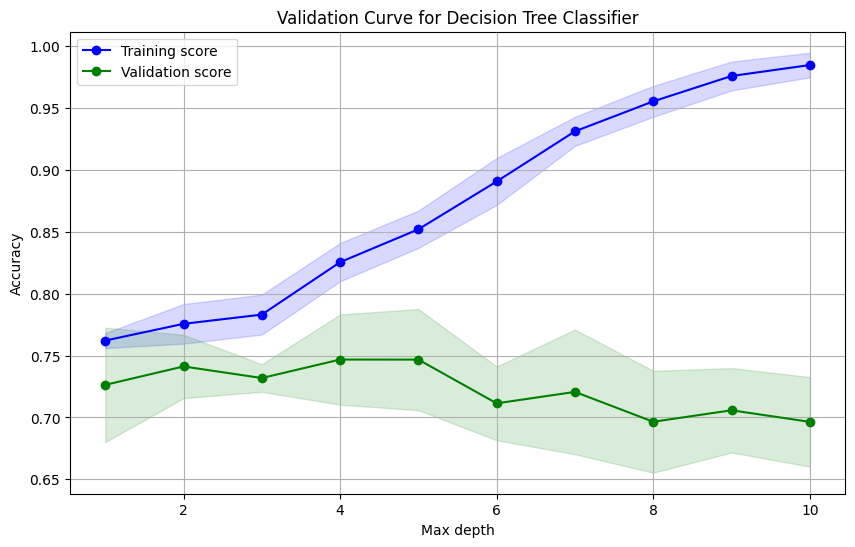

In [2509]:
param_range = np.arange(1, 11)

# Calculate validation scores for different values of C
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(criterion='gini', random_state=0), 
    X_train, y_train, param_name='max_depth', param_range=param_range, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='b', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')
plt.plot(param_range, test_mean, label='Validation score', color='g', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')
plt.title('Validation Curve for Decision Tree Classifier')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("Validation Curve Decision Tree Classifier.jpg")
plt.show()

## Learning curve

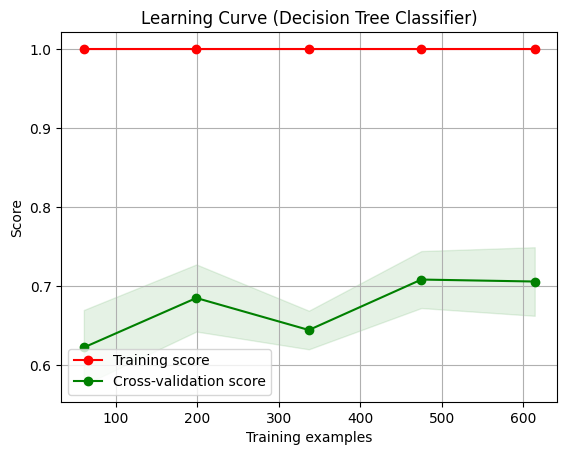

In [2510]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Load a dataset (example: the digits dataset)

# Create a logistic regression model
model = DecisionTreeClassifier(criterion='gini',random_state=0)

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Create the learning curve plot
plot_learning_curve(model, "Learning Curve (Decision Tree Classifier)", X, y, cv=5)
plt.savefig("Learning Curve Decision Tree Classifier2.jpg")

plt.show()

#Learning curves are helpful for understanding whether your model is suffering 
#from overfitting (high variance) or underfitting (high bias).

#The learning curve will help you assess whether your logistic regression model is overfitting or underfitting. 
#If the training and validation scores are both low and close to each other, it may indicate underfitting (high bias). 
#If there's a large gap between the training and validation scores, it may indicate overfitting (high variance).



# Using another dataset

## Logistic regresion

Model accuracy score: 0.9649
Training set score: 0.9890
Test set score: 0.9649


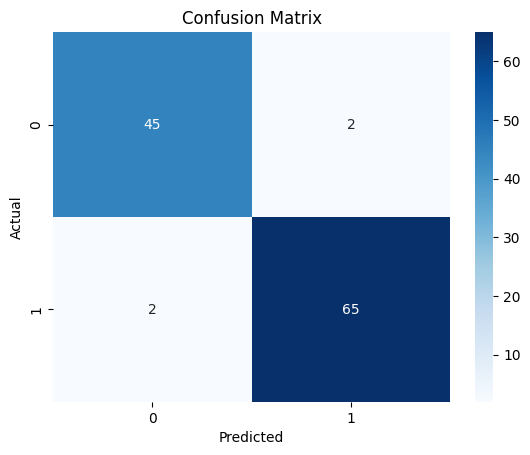

In [2511]:
from sklearn.metrics import confusion_matrix
import seaborn as sbs
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('data1.csv')
df = df.drop(['Unnamed: 32'], axis=1)
df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})

X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_test = log_reg.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Training set score: {:.4f}'.format(log_reg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(log_reg.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred_test)
sbs.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

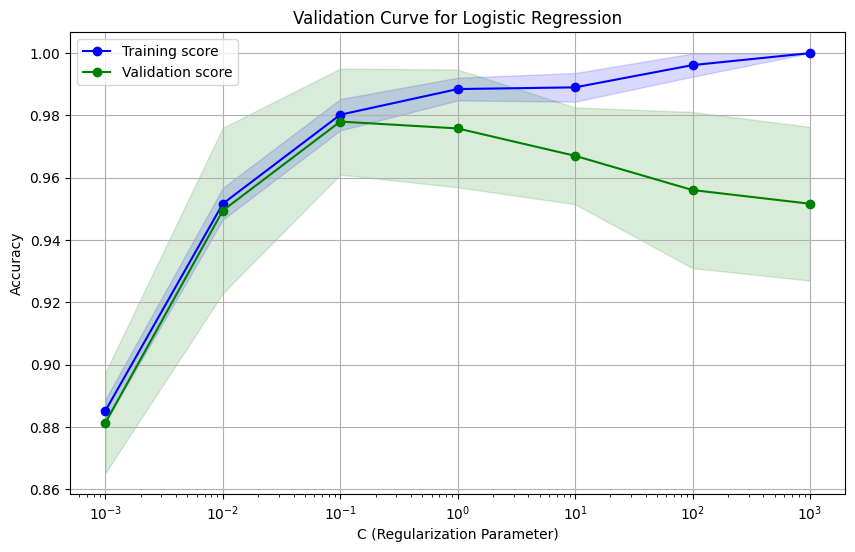

In [2512]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
param_range = np.logspace(-3, 3, 7)

# Calculate validation scores for different values of C
train_scores, test_scores = validation_curve(
    LogisticRegression(), 
    X_train, y_train, param_name='C', param_range=param_range, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_mean, label='Training score', color='b', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')
plt.semilogx(param_range, test_mean, label='Validation score', color='g', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')
plt.title('Validation Curve for Logistic Regression')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("Validation Curve (Logistic Regression)ad.jpg")
plt.show()

#explanation 



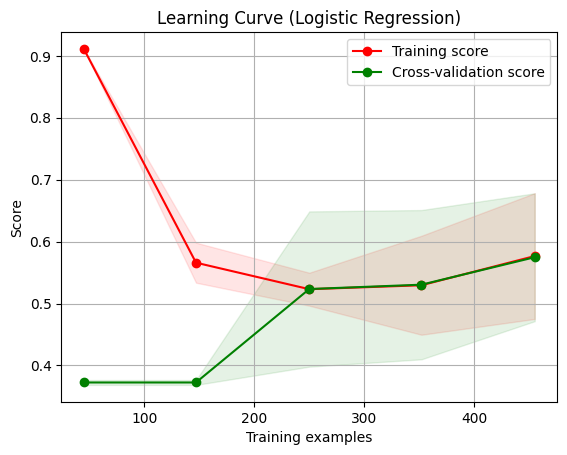

In [2513]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Load a dataset (example: the digits dataset)

# Create a logistic regression model
model = LogisticRegression()

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Create the learning curve plot
plot_learning_curve(model, "Learning Curve (Logistic Regression)", X, y, cv=5)
plt.savefig("Learning Curve (Logistic Regression)ad.jpg")
plt.show()

#Learning curves are helpful for understanding whether your model is suffering 
#from overfitting (high variance) or underfitting (high bias).

#The learning curve will help you assess whether your logistic regression model is overfitting or underfitting. 
#If the training and validation scores are both low and close to each other, it may indicate underfitting (high bias). 
#If there's a large gap between the training and validation scores, it may indicate overfitting (high variance).




## Decision tree

Model accuracy score with criterion gini index: 0.9035
Training set score: 0.9890
Test set score: 0.9649


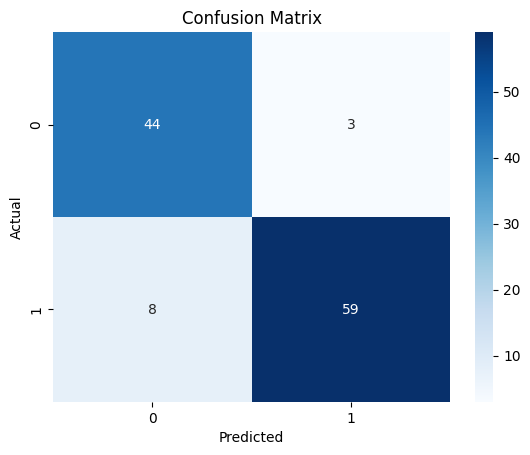

In [2514]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
clf_gini = DecisionTreeClassifier(criterion='gini',random_state=0)

clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)


print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
print('Training set score: {:.4f}'.format(log_reg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(log_reg.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred_gini)
sbs.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [2515]:
y_test.value_counts()

diagnosis
1    67
0    47
Name: count, dtype: int64

In [2516]:
y_test.value_counts()

null_accuracy = (108/(108+63))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6316


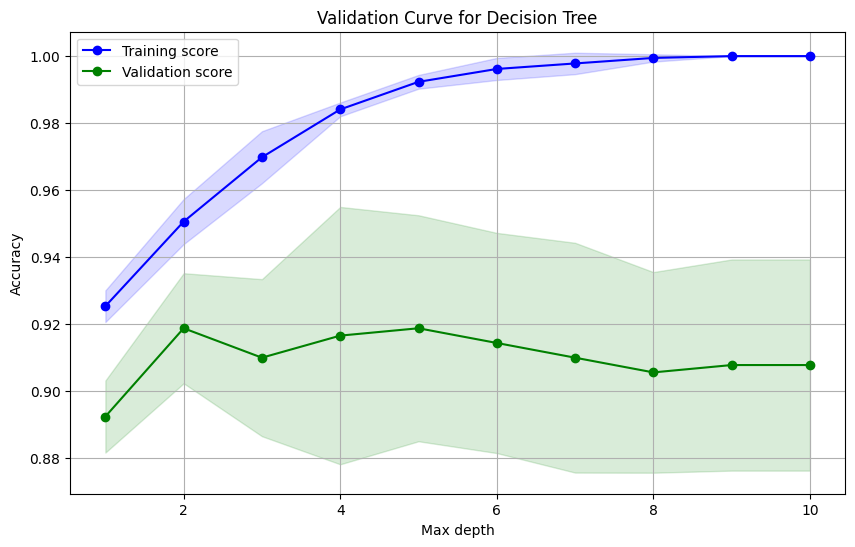

In [2517]:
param_range = np.arange(1, 11)

# Calculate validation scores for different values of C
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(criterion='gini', random_state=0), 
    X_train, y_train, param_name='max_depth', param_range=param_range, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='b', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')
plt.plot(param_range, test_mean, label='Validation score', color='g', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')
plt.title('Validation Curve for Decision Tree')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

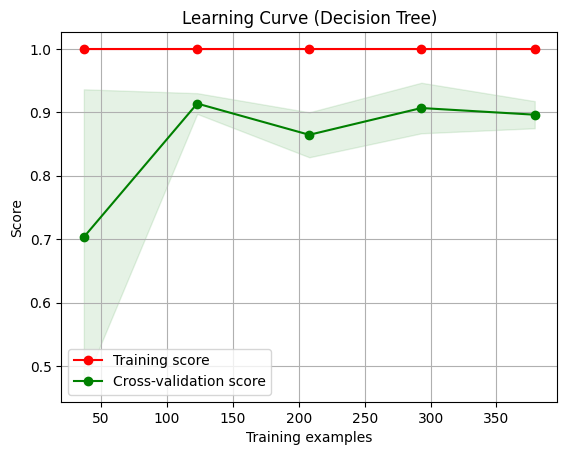

In [2518]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Load a dataset (example: the digits dataset)

# Create a logistic regression model
model = DecisionTreeClassifier(criterion='gini', random_state=0)

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Create the learning curve plot
plot_learning_curve(model, "Learning Curve (Decision Tree)", X, y, cv=3)

plt.show()

#Learning curves are helpful for understanding whether your model is suffering 
#from overfitting (high variance) or underfitting (high bias).

#The learning curve will help you assess whether your logistic regression model is overfitting or underfitting. 
#If the training and validation scores are both low and close to each other, it may indicate underfitting (high bias). 
#If there's a large gap between the training and validation scores, it may indicate overfitting (high variance).

# Decision Tree using gridsearch

In [2519]:
from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}]



grid_search = GridSearchCV(estimator = DecisionTreeClassifier(criterion='gini', random_state=0),  
                           param_grid = parameters,
                           #scoring = 'accuracy',
                           cv = 5,)
                           #verbose=0)


grid_search.fit(X_train, y_train)
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('GridSearch CV score on train set: {0:0.4f}'.format(grid_search.score(X_train, y_train)))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))


GridSearch CV best score : 0.9187


Parameters that give the best results : 

 {'max_depth': 2}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=2, random_state=0)
GridSearch CV score on train set: 0.9516
GridSearch CV score on test set: 0.9649


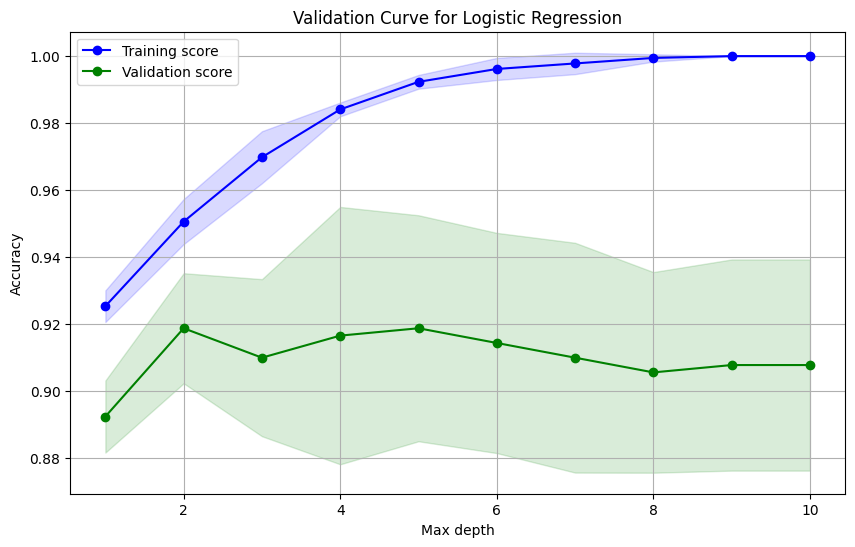

In [2520]:
param_range = np.arange(1, 11)

# Calculate validation scores for different values of C
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(criterion='gini',max_depth=2, random_state=0), 
    X_train, y_train, param_name='max_depth', param_range=param_range, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='b', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')
plt.plot(param_range, test_mean, label='Validation score', color='g', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')
plt.title('Validation Curve for Logistic Regression')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

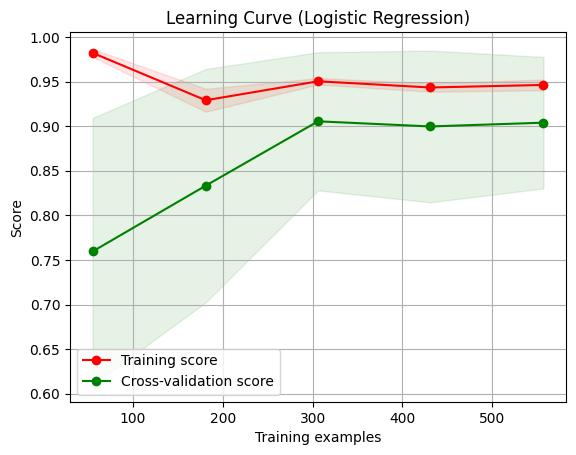

In [2521]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Load a dataset (example: the digits dataset)

# Create a logistic regression model
model = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Create the learning curve plot
plot_learning_curve(model, "Learning Curve (Logistic Regression)", X, y, cv=50)

plt.show()

#Learning curves are helpful for understanding whether your model is suffering 
#from overfitting (high variance) or underfitting (high bias).

#The learning curve will help you assess whether your logistic regression model is overfitting or underfitting. 
#If the training and validation scores are both low and close to each other, it may indicate underfitting (high bias). 
#If there's a large gap between the training and validation scores, it may indicate overfitting (high variance).


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('DataDummy (1).csv')

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#FUNCIÓN DE IMPLEMENTACIÓN DEL MODELO KNN
def knn_Model(X_train, X_test, y_train, y_test, k):
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train,y_train)
    y_pred=knn_classifier.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    return accuracy
    
def knn_Model1(X_train, X_test, y_train, y_test, k):
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train,y_train)
    y_pred=knn_classifier.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    c = classification_report(y_test, y_pred)
    return c
#FUNCIÓN PARA CREAR FOLDS DE LOS DATOS
def Create_fold(data,fold,step):
    r1=fold*step
    if fold<4:
        r2=r1+step
    else:
        r2=len(data)
    Test=data.iloc[r1:r2]
    Train=data.drop(index=data.index[r1:r2])
    return Test, Train
for i in range(1,5):
    doc="DataDummy"+str(i)+".csv"
    Data=pd.read_csv(doc)
    step=round(len(Data)/5)
    for fold in range(5):
        test,train=Create_fold(Data,fold,step)
        y_test=test['Survived'].values
        y_train=train['Survived'].values
        X_test=test.drop('Survived',axis=1).values
        X_train=train.drop('Survived',axis=1).values
        presicion=knn_Model(X_train, X_test, y_train, y_test, 3)
        print('DataSet {}, fold {}, precisión: {}'.format(i,fold+1,round(presicion,2)))
        
        report=knn_Model1(X_train, X_test, y_train, y_test, 3)
        print(report)
        print('')

DataSet 1, fold 1, precisión: 0.76
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       119
           1       0.64      0.64      0.64        59

    accuracy                           0.76       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.76      0.76      0.76       178


DataSet 1, fold 2, precisión: 0.75
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       100
           1       0.76      0.62      0.68        78

    accuracy                           0.75       178
   macro avg       0.75      0.73      0.74       178
weighted avg       0.75      0.75      0.74       178


DataSet 1, fold 3, precisión: 0.77
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.71      0.70      0.71        70

    accuracy                           0.77       178
   macro avg       0.

In [28]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
def Create_fold(data,fold,step):
    r1=fold*step
    if fold<4:
        r2=r1+step
    else:
        r2=len(data)
    Test=data.iloc[r1:r2]
    Train=data.drop(index=data.index[r1:r2])
    return Test, Train
def ArbolDesicion(X_train, X_test, y_train, y_test):
    model=DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    return accuracy
def ArbolDesicion1(X_train, X_test, y_train, y_test):
    model=DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    c = classification_report(y_test, y_pred)
    return c
for i in range(1,5):
    doc="DataDummy"+str(i)+".csv"
    Data=pd.read_csv(doc)
    step=round(len(Data)/5)
    for fold in range(5):
        test,train=Create_fold(Data,fold,step)
        y_test=test['Survived'].values
        y_train=train['Survived'].values
        X_test=test.drop('Survived',axis=1).values
        X_train=train.drop('Survived',axis=1).values
        presicion=ArbolDesicion(X_train, X_test, y_train, y_test)
        print('DataSet {}, fold {}, precisión: {}'.format(i,fold+1,round(presicion,2)))
        print(ArbolDesicion1(X_train, X_test, y_train, y_test))
        print('')

DataSet 1, fold 1, precisión: 0.71
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       119
           1       0.58      0.64      0.61        59

    accuracy                           0.72       178
   macro avg       0.69      0.70      0.70       178
weighted avg       0.73      0.72      0.73       178


DataSet 1, fold 2, precisión: 0.76
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       100
           1       0.73      0.68      0.70        78

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178


DataSet 1, fold 3, precisión: 0.79
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       108
           1       0.74      0.74      0.74        70

    accuracy                           0.80       178
   macro avg       0.

In [33]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
def Create_fold(data,fold,step):
    r1=fold*step
    if fold<4:
        r2=r1+step
    else:
        r2=len(data)
    Test=data.iloc[r1:r2]
    Train=data.drop(index=data.index[r1:r2])
    return Test, Train
def RandomF(X_train, X_test, y_train, y_test):
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy
def RandomF1(X_train, X_test, y_train, y_test):
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    c = classification_report(y_test, y_pred)
    return c
for i in range(1,5):
    doc="DataDummy"+str(i)+".csv"
    Data=pd.read_csv(doc)
    step=round(len(Data)/5)
    for fold in range(5):
        test,train=Create_fold(Data,fold,step)
        y_test=test['Survived'].values
        y_train=train['Survived'].values
        X_test=test.drop('Survived',axis=1).values
        X_train=train.drop('Survived',axis=1).values
        presicion=RandomF(X_train, X_test, y_train, y_test)
        print('DataSet {}, fold {}, precisión: {}'.format(i,fold+1,round(presicion,2)))
        print(RandomF1(X_train, X_test, y_train, y_test))
        print('')

DataSet 1, fold 1, precisión: 0.76
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       119
           1       0.67      0.71      0.69        59

    accuracy                           0.79       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.79      0.79      0.79       178


DataSet 1, fold 2, precisión: 0.8
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       100
           1       0.79      0.68      0.73        78

    accuracy                           0.78       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178


DataSet 1, fold 3, precisión: 0.85
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       108
           1       0.80      0.79      0.79        70

    accuracy                           0.84       178
   macro avg       0.8

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#FUNCIÓN PARA CREAR FOLDS DE LOS DATOS
def Create_fold(data,fold,step):
    r1=fold*step
    if fold<4:
        r2=r1+step
    else:
        r2=len(data)
    Test=data.iloc[r1:r2]
    Train=data.drop(index=data.index[r1:r2])
    return Test, Train
def RegresionL(X_train,X_test,y_train,y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy
def RegresionL1(X_train,X_test,y_train,y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    c = classification_report(y_test, y_pred)
    return c
for i in range(1,5):
    doc="DataDummy"+str(i)+".csv"
    Data=pd.read_csv(doc)
    step=round(len(Data)/5)
    for fold in range(5):
        test,train=Create_fold(Data,fold,step)
        y_test=test['Survived'].values
        y_train=train['Survived'].values
        X_test=test.drop('Survived',axis=1).values
        X_train=train.drop('Survived',axis=1).values
        presicion=RegresionL(X_train,X_test,y_train,y_test)
        print('DataSet {}, fold {}, precisión: {}'.format(i,fold+1,round(presicion,2)))
        print(RegresionL1(X_train,X_test,y_train,y_test))
        print('')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

DataSet 1, fold 1, precisión: 0.79
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       119
           1       0.68      0.71      0.69        59

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.80      0.79      0.79       178


DataSet 1, fold 2, precisión: 0.78
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       100
           1       0.81      0.64      0.71        78

    accuracy                           0.78       178
   macro avg       0.78      0.76      0.76       178
weighted avg       0.78      0.78      0.77       178


DataSet 1, fold 3, precisión: 0.78


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       108
           1       0.72      0.73      0.72        70

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178


DataSet 1, fold 4, precisión: 0.77
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       107
           1       0.75      0.63      0.69        71

    accuracy                           0.77       178
   macro avg       0.76      0.75      0.75       178
weighted avg       0.77      0.77      0.77       178


DataSet 1, fold 5, precisión: 0.84
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       115
           1       0.81      0.72      0.76        64

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
we

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

DataSet 2, fold 1, precisión: 0.78
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       119
           1       0.65      0.73      0.69        59

    accuracy                           0.78       178
   macro avg       0.75      0.77      0.76       178
weighted avg       0.79      0.78      0.78       178


DataSet 2, fold 2, precisión: 0.78
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.81      0.65      0.72        78

    accuracy                           0.78       178
   macro avg       0.79      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

DataSet 2, fold 3, precisión: 0.77
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.71      0.70      0.71        70

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178


DataSet 2, fold 4, precisión: 0.76


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       107
           1       0.75      0.62      0.68        71

    accuracy                           0.76       178
   macro avg       0.76      0.74      0.75       178
weighted avg       0.76      0.76      0.76       178


DataSet 2, fold 5, precisión: 0.84
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       115
           1       0.82      0.70      0.76        64

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179


DataSet 3, fold 1, precisión: 0.78
              precision    recall  f1-score   support

           0       0.88      0.77      0.83       119
           1       0.64      0.80      0.71        59

    accuracy                           0.78       178
   macro avg       0.76      0.78      0.77       178
we

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

DataSet 3, fold 2, precisión: 0.81
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       100
           1       0.84      0.72      0.77        78

    accuracy                           0.81       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.81      0.81       178


DataSet 3, fold 3, precisión: 0.79
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       108
           1       0.74      0.73      0.73        70

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178


DataSet 3, fold 4, precisión: 0.8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       107
           1       0.81      0.66      0.73        71

    accuracy                           0.80       178
   macro avg       0.81      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178


DataSet 3, fold 5, precisión: 0.85
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       115
           1       0.80      0.80      0.80        64

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179


DataSet 4, fold 1, precisión: 0.81
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       119
           1       0.71      0.71      0.71        59

    accuracy                           0.81       178
   macro avg       0.78      0.78      0.78       178
we